In [24]:
# pip install arch --install-option="--no-binary"
# https://nbviewer.jupyter.org/github/bashtage/arch/blob/master/examples/univariate_volatility_modeling.ipynb

In [83]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['axes.edgecolor']='black'
matplotlib.rcParams['xtick.color']='black'
matplotlib.rcParams['ytick.color']='black'
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["black", "#e94cdc", "0.7"])
matplotlib.rcParams['axes.linewidth']=1.3
matplotlib.rcParams['text.color']='black'
# color_names = np.load('/Users/anton.andreytsev/Desktop/new_comp/color_names.npy')
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.filters.hp_filter import hpfilter
from arch import arch_model
from statsmodels.tsa import stattools, arima_model

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8, 8)

### Задача 1

В файле real_gdp_usa_xlsx имеются квартальные данные о динамике реального ВВП США (сезонно сглаженный ряд) в ценах 2005 года.

(а) Используя фильтр Ходрика — Прескотта, оцените потенциальный
ВВП США на рассматриваемом промежутке.

(б) Сгенерируйте переменную gap, характеризующую отклонение (в процентах) фактического ряда от сглаженного. Постройте ее график, дайте
содержательную интерпретацию, указав примеры периодов экономических кризисов и экономических подъемов.

In [3]:
dat = pd.read_excel('/Users/anton.andreytsev/Desktop/real_gdp_usa.xlsx')

In [37]:
nominal_gdp = hpfilter(dat.gdp)[1]

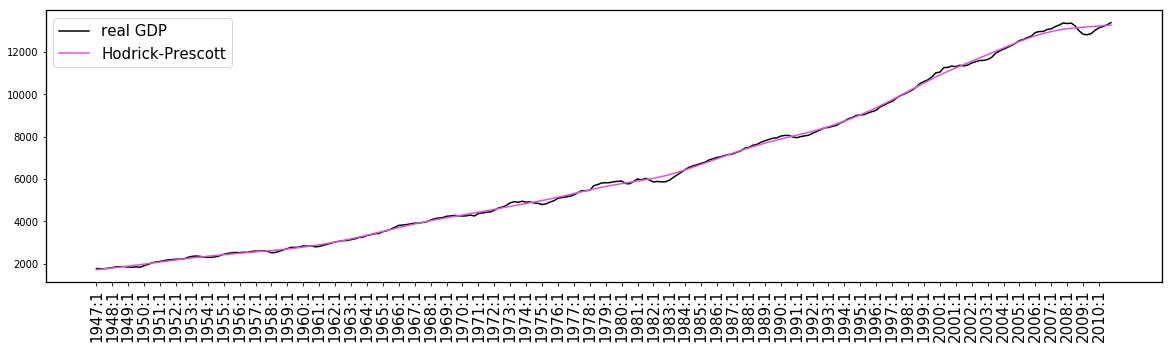

In [43]:
plt.figure(figsize=(20, 5))
plt.plot(dat.gdp, label=u'real GDP');
plt.plot(nominal_gdp, label=u'Hodrick-Prescott');
plt.xticks(np.arange(0, dat.date.shape[0], 4), dat.date[np.arange(0, dat.date.shape[0], 4)], rotation=90, fontsize=15)
plt.legend(fontsize=15);

In [53]:
gap = (dat.gdp - nominal_gdp)/nominal_gdp

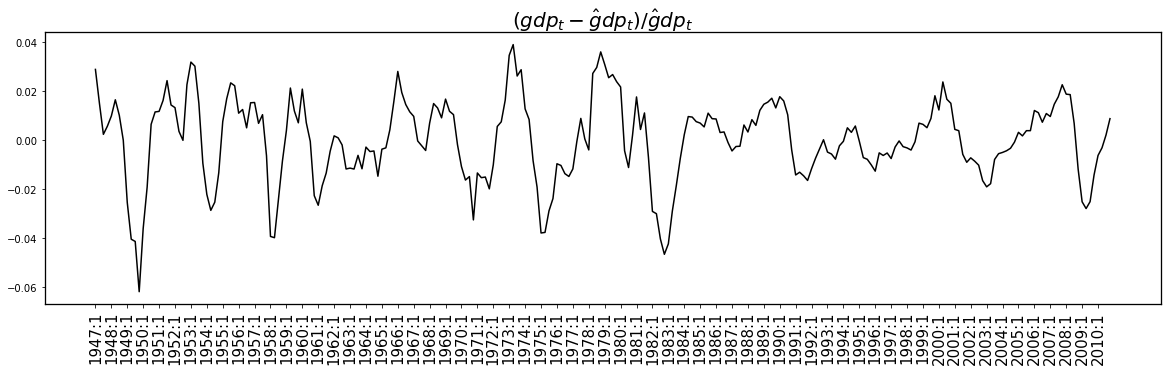

In [58]:
plt.figure(figsize=(20, 5))
plt.plot(gap);
plt.xticks(np.arange(0, dat.date.shape[0], 4), dat.date[np.arange(0, dat.date.shape[0], 4)], rotation=90, fontsize=15);
plt.title(r"$(gdp_{t} - \hat gdp_{t})/\hat gdp_{t}$", fontsize=20);

### Задача 5

В файле garch.csv представлены данные о динамике курса немецкой марки
к доллару США (переменная DM). В соответствии с теорией динамика логарифма обменного курса обычно хорошо описывается процессом случайного блуждания (быть может, с дрейфом): $\ln DM_{t} = \ln DM_{t−1} + \theta + \epsilon_{t}$

Поэтому, создав переменную $DDM_{t} = \ln DM_{t} - \ln DM_{t−1} $, можно перейти к
анализу простой модели $DDM_{t} = \theta + \epsilon_{t}$.

(а) Оцените параметры модели, предполагая, что случайные ошибки в
данной модели описываются процессом ARCH(1).

(б) Оцените параметры модели, предполагая, что случайные ошибки в
данной модели описываются процессом GARCH(1,1).

(в) Проанализировав значимость соответствующих коэффициентов,
объясните, почему модель пункта (б) предпочтительна по отношению к
модели из пункта (а) и по отношению к модели без условной гетероскедастичности.

(г) Для модели из пункта (б) постройте график волатильности валютного
курса.

In [124]:
dat = pd.read_csv('/Users/tony/Desktop/garch.csv')

In [5]:
dat.head()

,BP,CD,DATE,DAY,DDM,DM,DY,SF
0,2.2490,0.8547,800102,3,NaN,0.5861,0.004206,0.6365
1,2.2365,0.8552,800103,4,-0.004103,0.5837,0.004187,0.6357
2,2.2410,0.8566,800104,5,0.000856,0.5842,0.004269,0.6355
3,2.2645,0.8538,800107,1,0.001881,0.5853,0.004315,0.6373
4,2.2560,0.8553,800108,2,-0.004967,0.5824,0.004257,0.6329


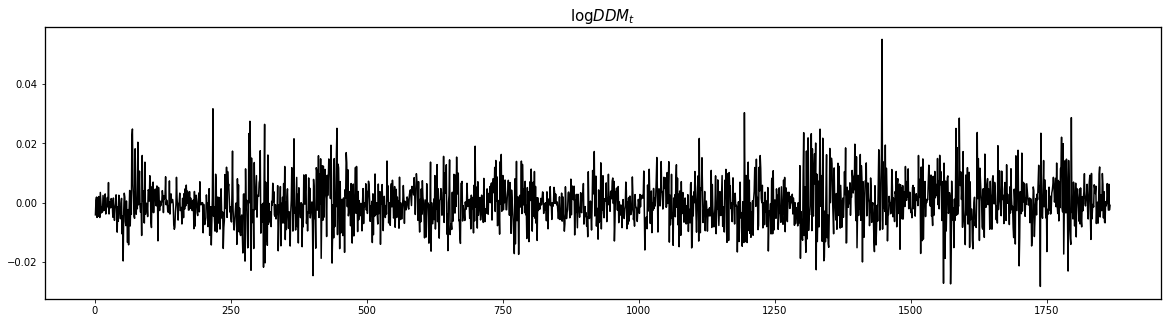

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(dat.DDM);
plt.title(u'$\log DDM_{t}$', fontsize=15);

In [11]:
from arch import arch_model

In [125]:
model_arch1 = arch_model(dat.DDM.values[1:], vol='Garch', p=1, o=0, q=0, dist='Normal', mean='ARX').fit()
print(model_arch1.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: -6338.354977633911
Iteration:      2,   Func. Count:     18,   Neg. LLF: -6338.770340914647
Iteration:      3,   Func. Count:     29,   Neg. LLF: -6338.7923584912605
Iteration:      4,   Func. Count:     44,   Neg. LLF: -6338.554322979227
Iteration:      5,   Func. Count:     58,   Neg. LLF: -6338.814215555288
Iteration:      6,   Func. Count:     73,   Neg. LLF: -6338.588131178387
Iteration:      7,   Func. Count:     88,   Neg. LLF: -6338.814218152357
Iteration:      8,   Func. Count:     98,   Neg. LLF: -6338.923054913361
Iteration:      9,   Func. Count:    111,   Neg. LLF: -6339.031987018067
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -6339.031982890019
            Iterations: 13
            Function evaluations: 111
            Gradient evaluations: 9
                           AR - ARCH Model Results                            
Dep. Variable:                      y   R-s

//anaconda/lib/python3.5/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


In [103]:
model_garch11 = arch_model(dat.DDM.values[1:], vol='Garch', p=1, o=0, q=1, dist='Normal').fit()
print(model_garch11.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -6527.5377725199505
Iteration:      2,   Func. Count:     20,   Neg. LLF: -6528.386807739224
Iteration:      3,   Func. Count:     36,   Neg. LLF: -6518.319035852911
Iteration:      4,   Func. Count:     52,   Neg. LLF: -6526.350666145736
Iteration:      5,   Func. Count:     66,   Neg. LLF: -6528.386791192921
Iteration:      6,   Func. Count:     82,   Neg. LLF: -6520.222456462885
Iteration:      7,   Func. Count:     98,   Neg. LLF: -6528.016625274153
Iteration:      8,   Func. Count:    112,   Neg. LLF: -6528.386951516404
Iteration:      9,   Func. Count:    128,   Neg. LLF: -6524.384194490293
Iteration:     10,   Func. Count:    144,   Neg. LLF: -6528.371853001557
Iteration:     11,   Func. Count:    158,   Neg. LLF: -6528.386947738111
Iteration:     12,   Func. Count:    174,   Neg. LLF: -6526.284456802999
Iteration:     13,   Func. Count:    190,   Neg. LLF: -6528.386145071565
Iteration:     14,   Func. Count:    204,   Neg. L

//anaconda/lib/python3.5/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


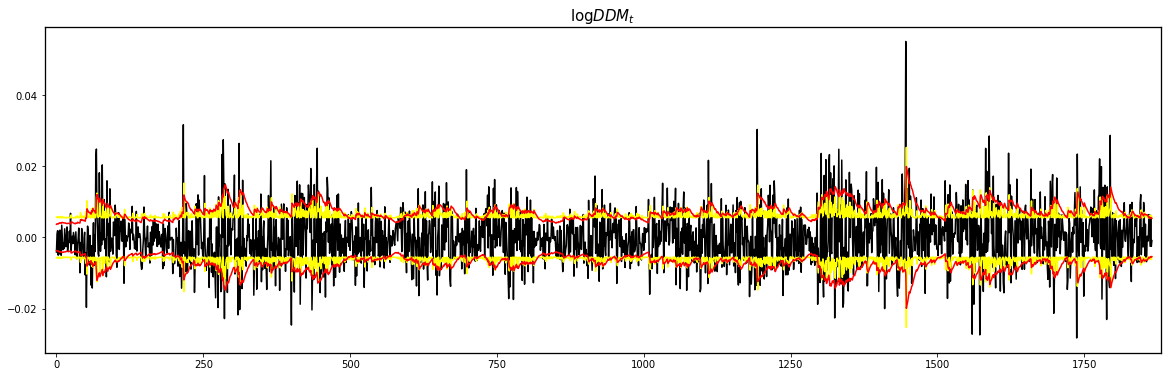

In [126]:
plt.figure(figsize=(20, 6))
plt.plot(dat.DDM.values[1:]);
plt.plot(model_arch1.conditional_volatility, color='yellow')
plt.plot(-model_arch1.conditional_volatility, color='yellow')
plt.plot(model_garch11.conditional_volatility, color='red')
plt.plot(-model_garch11.conditional_volatility, color='red')
plt.title(u'$\log DDM_{t}$', fontsize=15);
plt.xlim(-20, 1880);

### Задание 6

Файл с данными: USMacro_Quarterly
    
(а) Создайте переменную $\Delta y_{t}$
, где $y_{t} = \ln real GDP_{t}$. Созданная таким образом
переменная характеризует темп прироста реального ВВП.

(б) Для созданной переменной оцените модель AR(1), где случайные
ошибки описываются процессом GARCH(1,1). Используйте данные за период
1955:01–2009:04.

(в) Постройте график волатильности темпа прироста ВВП. Многие макроэкономисты
считают, что примерно в 1983 году изменчивость ВВП заметно
сократилась, что объясняется успехами в проведении стабилизационной
макроэкономической политики. Это сглаживание экономических
циклов называют «Великое успокоение» («Great Moderation»). Подтверждает
ли оцененная вами модель гипотезу о «Великом успокоении»?

In [76]:
dat = pd.read_excel('/Users/tony/Desktop/UsMacro_Quarterly.xlsx')
dat.columns = [i.lower() for i in dat.columns]

In [77]:
delta_y = np.diff(np.log(dat.realgdp))

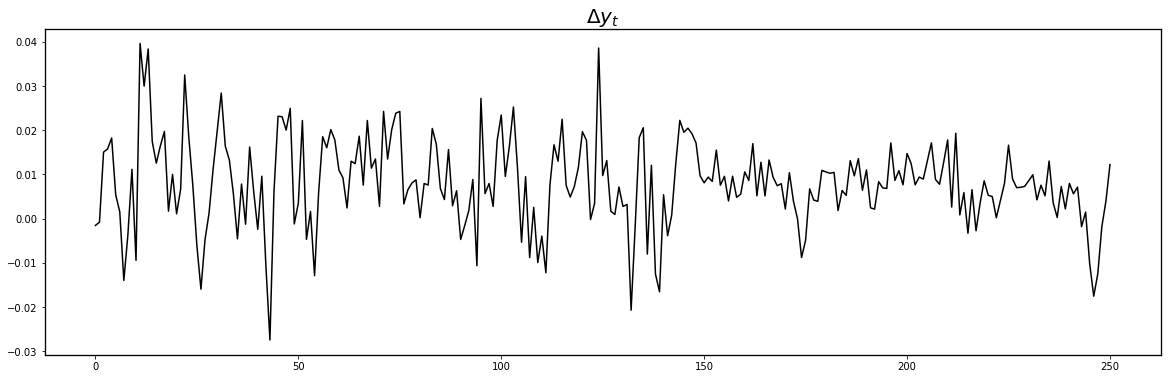

In [81]:
plt.figure(figsize=(20, 6))
plt.plot(delta_y);
plt.title(r'$\Delta y_{t}$', fontsize=20);

In [142]:
model_ar1_garch = arch_model(delta_y, vol='Garch', mean='ARX', p=1, q=1, lags=1).fit()
print(model_ar1_garch.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: -833.2747165583772
Iteration:      2,   Func. Count:     21,   Neg. LLF: -833.2768859371334
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -833.2768861620276
            Iterations: 6
            Function evaluations: 21
            Gradient evaluations: 2
                           AR - GARCH Model Results                           
Dep. Variable:                      y   R-squared:                       0.136
Mean Model:                        AR   Adj. R-squared:                  0.132
Vol Model:                      GARCH   Log-Likelihood:                833.277
Distribution:                  Normal   AIC:                          -1656.55
Method:            Maximum Likelihood   BIC:                          -1638.95
                                        No. Observations:                  250
Date:                Fri, Apr 26 2019   Df Residuals:                      245
Time

//anaconda/lib/python3.5/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


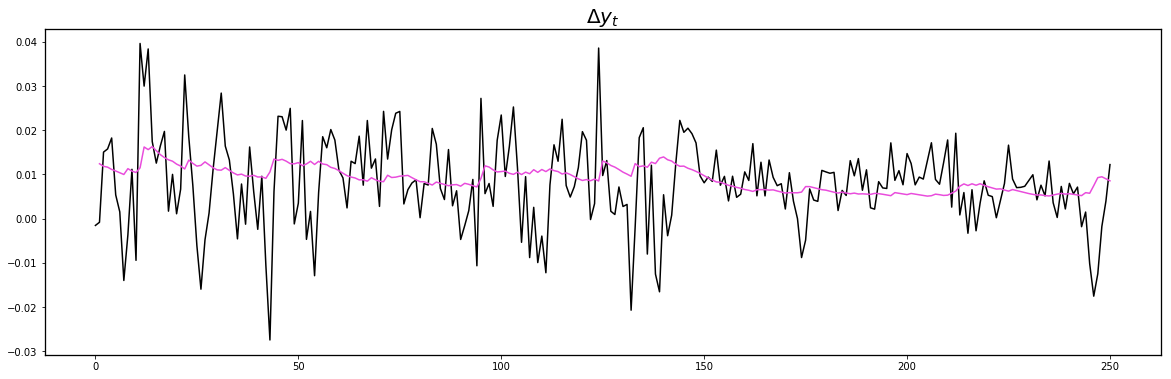

In [143]:
plt.figure(figsize=(20, 6))
plt.plot(delta_y);
plt.plot(model_ar1_garch.conditional_volatility)
plt.title(r'$\Delta y_{t}$', fontsize=20);